CLASSIFICATION USING CATBOOST AND XBOOST
LIME SHAP FEATURE IMPORTANCE


In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-72).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
openjdk version "11.0.19" 2023-04-18
OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)


In [3]:
!pip install pandas
!pip install numpy
!pip install xgboost
!pip install scikit-learn
!pip install lime
!pip install catboost
!pip install lime



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=d20c0787f927c9435826d066d38e6da0b1e95529cd254497f49777d2335f7dc1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
    

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lime import lime_tabular

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Define new threshold values for different risk levels
low_risk_threshold = 100
high_risk_threshold = 500

# Convert target variable into classes based on new thresholds
data['RiskLevel'] = np.where(data['Deaths'] <= low_risk_threshold, 'Low Risk',
                             np.where(data['Deaths'] <= high_risk_threshold, 'Medium Risk', 'High Risk'))

# Split the data into features (X) and target variable (y)
X = data.drop(['Deaths', 'RiskLevel'], axis=1)
y = data['RiskLevel']

# Encode the categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the preprocessing steps
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Replace infinity values with a large finite value
X_train.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data to float32
X_train_processed = X_train_processed.astype(np.float32)
X_test_processed = X_test_processed.astype(np.float32)

# Train CatBoost model
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_processed, y_train)

# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_processed, y_train)

# Make predictions on the testing set
catboost_predictions = catboost_model.predict(X_test_processed)
xgboost_predictions = xgboost_model.predict(X_test_processed)

# Evaluate model performance
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
print("CatBoost Accuracy:", catboost_accuracy)
print("XGBoost Accuracy:", xgboost_accuracy)




Learning rate set to 0.071805
0:	learn: 1.0467494	total: 14ms	remaining: 14s
1:	learn: 0.9898205	total: 27.3ms	remaining: 13.6s
2:	learn: 0.9342588	total: 34.7ms	remaining: 11.5s
3:	learn: 0.8940312	total: 44.4ms	remaining: 11.1s
4:	learn: 0.8526523	total: 53.2ms	remaining: 10.6s
5:	learn: 0.8147765	total: 63.8ms	remaining: 10.6s
6:	learn: 0.7836607	total: 73.8ms	remaining: 10.5s
7:	learn: 0.7615919	total: 94.1ms	remaining: 11.7s
8:	learn: 0.7281086	total: 104ms	remaining: 11.4s
9:	learn: 0.6968824	total: 116ms	remaining: 11.5s
10:	learn: 0.6746462	total: 126ms	remaining: 11.3s
11:	learn: 0.6503555	total: 140ms	remaining: 11.5s
12:	learn: 0.6271890	total: 148ms	remaining: 11.3s
13:	learn: 0.6105805	total: 165ms	remaining: 11.7s
14:	learn: 0.5879456	total: 181ms	remaining: 11.9s
15:	learn: 0.5705931	total: 195ms	remaining: 12s
16:	learn: 0.5541559	total: 209ms	remaining: 12.1s
17:	learn: 0.5395331	total: 220ms	remaining: 12s
18:	learn: 0.5230107	total: 237ms	remaining: 12.2s
19:	learn: 

In [ ]:
!pip install lime
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lime import lime_tabular

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Define new threshold values for different risk levels
low_risk_threshold = 100
high_risk_threshold = 500

# Convert target variable into classes based on new thresholds
data['RiskLevel'] = np.where(data['Deaths'] <= low_risk_threshold, 'Low Risk',
                             np.where(data['Deaths'] <= high_risk_threshold, 'Medium Risk', 'High Risk'))

# Split the data into features (X) and target variable (y)
X = data.drop(['Deaths', 'RiskLevel'], axis=1)
y = data['RiskLevel']

# Encode the categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the preprocessing steps
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Replace infinity values with a large finite value
X_train.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data to float32
X_train_processed = X_train_processed.astype(np.float32)
X_test_processed = X_test_processed.astype(np.float32)

# Train CatBoost model
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_processed, y_train)

# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_processed, y_train)

# Initialize Lime explainer for CatBoost
catboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=X.columns,
                                                            class_names=label_encoder.classes_)

# Select an instance for explanation for CatBoost
catboost_instance_index = 0
catboost_instance = X_test_processed[catboost_instance_index]

# Explain predictions using Lime for CatBoost
catboost_lime_explanation = catboost_lime_explainer.explain_instance(catboost_instance,
                                                                     catboost_model.predict_proba,
                                                                     num_features=len(X.columns))

# Get Lime explanation for the predicted class for CatBoost
catboost_lime_explanation_predicted_class = catboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for CatBoost
print("Lime Explanation for Predicted Class (CatBoost):")
for feature, weight in catboost_lime_explanation_predicted_class:
    print(f"{feature}: {weight}")

# Initialize Lime explainer for XGBoost
xgboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=X.columns,
                                                           class_names=label_encoder.classes_)

# Select an instance for explanation for XGBoost
xgboost_instance_index = 0
xgboost_instance = X_test_processed[xgboost_instance_index]

# Explain predictions using Lime for XGBoost
xgboost_lime_explanation = xgboost_lime_explainer.explain_instance(xgboost_instance,
                                                                   xgboost_model.predict_proba,
                                                                   num_features=len(X.columns))

# Get Lime explanation for the predicted class for XGBoost
xgboost_lime_explanation_predicted_class = xgboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for XGBoost
print("Lime Explanation for Predicted Class (XGBoost):")
for feature, weight in xgboost_lime_explanation_predicted_class:
    print(f"{feature}: {weight}")

# Make predictions on the testing set using CatBoost
catboost_predictions = catboost_model.predict(X_test_processed)

# Make predictions on the testing set using XGBoost
xgboost_predictions = xgboost_model.predict(X_test_processed)

# Evaluate model performance for CatBoost
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print("CatBoost Accuracy:", catboost_accuracy)

# Evaluate model performance for XGBoost
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
print("XGBoost Accuracy:", xgboost_accuracy)


Learning rate set to 0.071805
0:	learn: 1.0467494	total: 15.9ms	remaining: 15.9s
1:	learn: 0.9898205	total: 28.4ms	remaining: 14.2s
2:	learn: 0.9342588	total: 38.3ms	remaining: 12.7s
3:	learn: 0.8940312	total: 52.5ms	remaining: 13.1s
4:	learn: 0.8526523	total: 62.1ms	remaining: 12.4s
5:	learn: 0.8147765	total: 80.4ms	remaining: 13.3s
6:	learn: 0.7836607	total: 89.6ms	remaining: 12.7s
7:	learn: 0.7615919	total: 99.9ms	remaining: 12.4s
8:	learn: 0.7281086	total: 111ms	remaining: 12.2s
9:	learn: 0.6968824	total: 121ms	remaining: 12s
10:	learn: 0.6746462	total: 132ms	remaining: 11.9s
11:	learn: 0.6503555	total: 143ms	remaining: 11.7s
12:	learn: 0.6271890	total: 152ms	remaining: 11.5s
13:	learn: 0.6105805	total: 161ms	remaining: 11.3s
14:	learn: 0.5879456	total: 181ms	remaining: 11.9s
15:	learn: 0.5705931	total: 194ms	remaining: 11.9s
16:	learn: 0.5541559	total: 205ms	remaining: 11.9s
17:	learn: 0.5395331	total: 218ms	remaining: 11.9s
18:	learn: 0.5230107	total: 235ms	remaining: 12.1s
19:	l

In [ ]:
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Learning rate set to 0.071805
0:	learn: 1.0467494	total: 4.58ms	remaining: 4.58s
1:	learn: 0.9898205	total: 10.6ms	remaining: 5.31s
2:	learn: 0.9342588	total: 16.7ms	remaining: 5.56s
3:	learn: 0.8940312	total: 23.2ms	remaining: 5.79s
4:	learn: 0.8526523	total: 43.9ms	remaining: 8.73s
5:	learn: 0.8147765	total: 51.4ms	remaining: 8.52s
6:	learn: 0.7836607	total: 61.8ms	remaining: 8.77s
7:	learn: 0.7615919	total: 72.2ms	remaining: 8.95s
8:	learn: 0.7281086	total: 83.1ms	remaining: 9.15s
9:	learn: 0.6968824	total: 94.5ms	remaining: 9.35s
10:	learn: 0.6746462	total: 105ms	remaining: 9.41s
11:	learn: 0.6503555	total: 114ms	remaining: 9.37s
12:	learn: 0.6271890	total: 125ms	remaining: 9.5s
13:	learn: 0.6105805	total: 138ms	remaining: 9.71s
14:	learn: 0.5879456	total: 148ms	remaining: 9.75s
15:	learn: 0.5705931	total: 169ms	remaining: 10.4s
16:	learn: 0.5541559	total: 180ms	remaining: 10.4s
17:	learn: 0.5395331	total: 189ms	remaining: 10.3s
18:	learn: 0.5230107	total: 201ms	remaining: 10.4s
19

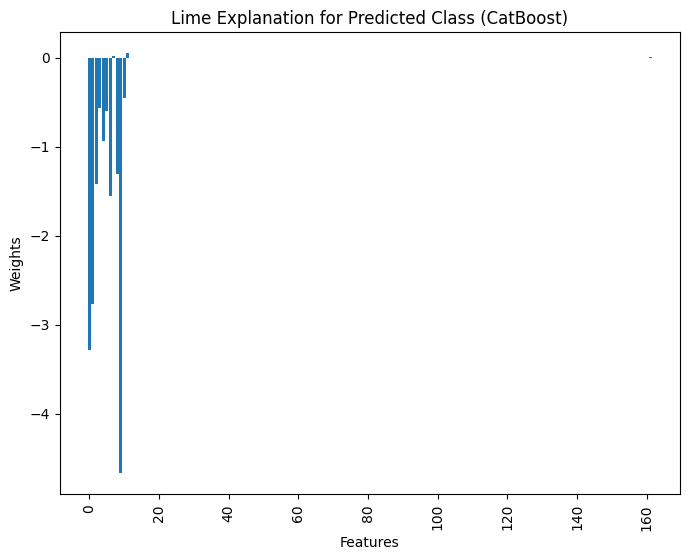

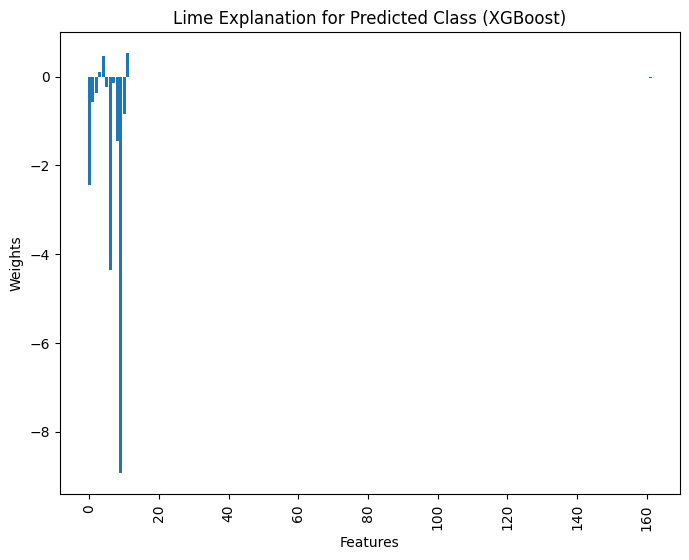

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lime import lime_tabular
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Define new threshold values for different risk levels
low_risk_threshold = 100
high_risk_threshold = 500

# Convert target variable into classes based on new thresholds
data['RiskLevel'] = np.where(data['Deaths'] <= low_risk_threshold, 'Low Risk',
                             np.where(data['Deaths'] <= high_risk_threshold, 'Medium Risk', 'High Risk'))

# Split the data into features (X) and target variable (y)
X = data.drop(['Deaths', 'RiskLevel'], axis=1)
y = data['RiskLevel']

# Encode the categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the preprocessing steps
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Replace infinity values with a large finite value
X_train.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data to float32
X_train_processed = X_train_processed.astype(np.float32)
X_test_processed = X_test_processed.astype(np.float32)

# Train CatBoost model
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_processed, y_train)

# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_processed, y_train)

# Initialize Lime explainer for CatBoost
catboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=X.columns,
                                                            class_names=label_encoder.classes_)

# Select an instance for explanation for CatBoost
catboost_instance_index = 0
catboost_instance = X_test_processed[catboost_instance_index]

# Explain predictions using Lime for CatBoost
catboost_lime_explanation = catboost_lime_explainer.explain_instance(catboost_instance,
                                                                     catboost_model.predict_proba,
                                                                     num_features=len(X.columns))

# Get Lime explanation for the predicted class for CatBoost
catboost_lime_explanation_predicted_class = catboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for CatBoost
print("Lime Explanation for Predicted Class (CatBoost):")
for feature, weight in catboost_lime_explanation_predicted_class:
    print(f"{feature}: {weight}")

# Initialize Lime explainer for XGBoost
xgboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=X.columns,
                                                           class_names=label_encoder.classes_)

# Select an instance for explanation for XGBoost
xgboost_instance_index = 0
xgboost_instance = X_test_processed[xgboost_instance_index]

# Explain predictions using Lime for XGBoost
xgboost_lime_explanation = xgboost_lime_explainer.explain_instance(xgboost_instance,
                                                                   xgboost_model.predict_proba,
                                                                   num_features=len(X.columns))

# Get Lime explanation for the predicted class for XGBoost
xgboost_lime_explanation_predicted_class = xgboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for XGBoost
print("Lime Explanation for Predicted Class (XGBoost):")
for feature, weight in xgboost_lime_explanation_predicted_class:
    print(f"{feature}: {weight}")

# Make predictions on the testing set using CatBoost
catboost_predictions = catboost_model.predict(X_test_processed)

# Make predictions on the testing set using XGBoost
xgboost_predictions = xgboost_model.predict(X_test_processed)

# Evaluate model performance for CatBoost
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print("CatBoost Accuracy:", catboost_accuracy)

# Evaluate model performance for XGBoost
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
print("XGBoost Accuracy:", xgboost_accuracy)

# Plot Lime explanation for CatBoost
plt.figure(figsize=(8, 6))
features, weights = zip(*catboost_lime_explanation_predicted_class)
plt.bar(features, weights)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Lime Explanation for Predicted Class (CatBoost)')
plt.show()

# Plot Lime explanation for XGBoost
plt.figure(figsize=(8, 6))
features, weights = zip(*xgboost_lime_explanation_predicted_class)
plt.bar(features, weights)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Lime Explanation for Predicted Class (XGBoost)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lime import lime_tabular
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Define new threshold values for different risk levels
low_risk_threshold = 100
high_risk_threshold = 500

# Convert target variable into classes based on new thresholds
data['RiskLevel'] = np.where(data['Deaths'] <= low_risk_threshold, 'Low Risk',
                             np.where(data['Deaths'] <= high_risk_threshold, 'Medium Risk', 'High Risk'))

# Split the data into features (X) and target variable (y)
X = data.drop(['Deaths', 'RiskLevel'], axis=1)
y = data['RiskLevel']

# Encode the categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the preprocessing steps
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Replace infinity values with a large finite value
X_train.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data to float32
X_train_processed = X_train_processed.astype(np.float32)
X_test_processed = X_test_processed.astype(np.float32)

# Train CatBoost model
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_processed, y_train)

# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_processed, y_train)

# Initialize Lime explainer for CatBoost
catboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=X.columns,
                                                            class_names=label_encoder.classes_)

# Select an instance for explanation for CatBoost
catboost_instance_index = 0
catboost_instance = X_test_processed[catboost_instance_index]

# Explain predictions using Lime for CatBoost
catboost_lime_explanation = catboost_lime_explainer.explain_instance(catboost_instance,
                                                                     catboost_model.predict_proba,
                                                                     num_features=len(X.columns))

# Get Lime explanation for the predicted class for CatBoost
catboost_lime_explanation_predicted_class = catboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for CatBoost
print("Lime Explanation for Predicted Class (CatBoost):")
for feature_index, weight in catboost_lime_explanation_predicted_class:
    feature_name = X.columns[feature_index]
    print(f"{feature_name}: {weight}")

# Initialize Lime explainer for XGBoost
xgboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=X.columns,
                                                           class_names=label_encoder.classes_)

# Select an instance for explanation for XGBoost
xgboost_instance_index = 0
xgboost_instance = X_test_processed[xgboost_instance_index]

# Explain predictions using Lime for XGBoost
xgboost_lime_explanation = xgboost_lime_explainer.explain_instance(xgboost_instance,
                                                                   xgboost_model.predict_proba,
                                                                   num_features=len(X.columns))

# Get Lime explanation for the predicted class for XGBoost
xgboost_lime_explanation_predicted_class = xgboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for XGBoost
print("Lime Explanation for Predicted Class (XGBoost):")
for feature_index, weight in xgboost_lime_explanation_predicted_class:
    feature_name = X.columns[feature_index]
    print(f"{feature_name}: {weight}")

# Make predictions on the testing set using CatBoost
catboost_predictions = catboost_model.predict(X_test_processed)

# Make predictions on the testing set using XGBoost
xgboost_predictions = xgboost_model.predict(X_test_processed)

# Evaluate model performance for CatBoost
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print("CatBoost Accuracy:", catboost_accuracy)

# Evaluate model performance for XGBoost
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
print("XGBoost Accuracy:", xgboost_accuracy)

# Plot Lime explanation for CatBoost
plt.figure(figsize=(8, 6))
features, weights = zip(*catboost_lime_explanation_predicted_class)
plt.bar(features, weights)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Lime Explanation for Predicted Class (CatBoost)')
plt.show()

# Plot Lime explanation for XGBoost
plt.figure(figsize=(8, 6))
features, weights = zip(*xgboost_lime_explanation_predicted_class)
plt.bar(features, weights)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Lime Explanation for Predicted Class (XGBoost)')
plt.show()


Learning rate set to 0.071805
0:	learn: 1.0467494	total: 9.02ms	remaining: 9.01s
1:	learn: 0.9898205	total: 22.8ms	remaining: 11.4s
2:	learn: 0.9342588	total: 35.9ms	remaining: 11.9s
3:	learn: 0.8940312	total: 45ms	remaining: 11.2s
4:	learn: 0.8526523	total: 61.9ms	remaining: 12.3s
5:	learn: 0.8147765	total: 72.4ms	remaining: 12s
6:	learn: 0.7836607	total: 94.7ms	remaining: 13.4s
7:	learn: 0.7615919	total: 110ms	remaining: 13.7s
8:	learn: 0.7281086	total: 126ms	remaining: 13.8s
9:	learn: 0.6968824	total: 140ms	remaining: 13.9s
10:	learn: 0.6746462	total: 153ms	remaining: 13.7s
11:	learn: 0.6503555	total: 176ms	remaining: 14.5s
12:	learn: 0.6271890	total: 192ms	remaining: 14.6s
13:	learn: 0.6105805	total: 218ms	remaining: 15.4s
14:	learn: 0.5879456	total: 228ms	remaining: 14.9s
15:	learn: 0.5705931	total: 242ms	remaining: 14.9s
16:	learn: 0.5541559	total: 250ms	remaining: 14.4s
17:	learn: 0.5395331	total: 260ms	remaining: 14.2s
18:	learn: 0.5230107	total: 270ms	remaining: 13.9s
19:	lear

IndexError: ignored

Learning rate set to 0.071805
0:	learn: 1.0467494	total: 12.8ms	remaining: 12.8s
1:	learn: 0.9898205	total: 25.1ms	remaining: 12.5s
2:	learn: 0.9342588	total: 41ms	remaining: 13.6s
3:	learn: 0.8940312	total: 45.6ms	remaining: 11.4s
4:	learn: 0.8526523	total: 53.8ms	remaining: 10.7s
5:	learn: 0.8147765	total: 60.2ms	remaining: 9.97s
6:	learn: 0.7836607	total: 69.4ms	remaining: 9.85s
7:	learn: 0.7615919	total: 78.5ms	remaining: 9.73s
8:	learn: 0.7281086	total: 86.3ms	remaining: 9.5s
9:	learn: 0.6968824	total: 90.7ms	remaining: 8.98s
10:	learn: 0.6746462	total: 97.2ms	remaining: 8.74s
11:	learn: 0.6503555	total: 102ms	remaining: 8.37s
12:	learn: 0.6271890	total: 108ms	remaining: 8.23s
13:	learn: 0.6105805	total: 113ms	remaining: 7.94s
14:	learn: 0.5879456	total: 120ms	remaining: 7.9s
15:	learn: 0.5705931	total: 127ms	remaining: 7.8s
16:	learn: 0.5541559	total: 131ms	remaining: 7.59s
17:	learn: 0.5395331	total: 137ms	remaining: 7.49s
18:	learn: 0.5230107	total: 142ms	remaining: 7.32s
19:	l

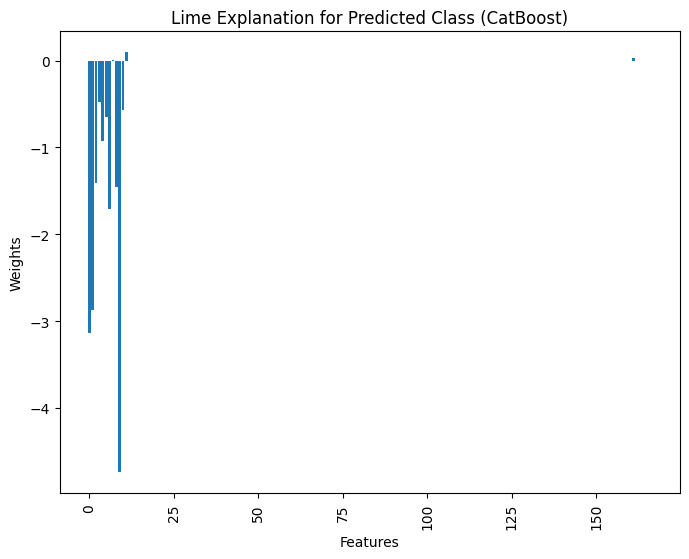

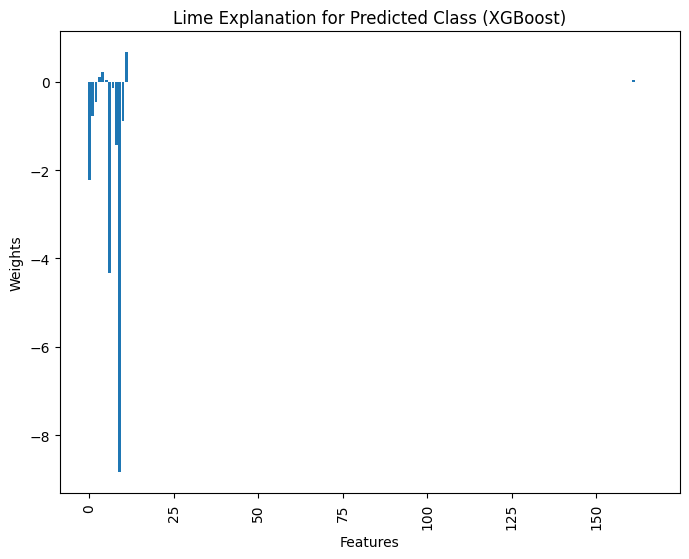

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lime import lime_tabular
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Define new threshold values for different risk levels
low_risk_threshold = 100
high_risk_threshold = 500

# Convert target variable into classes based on new thresholds
data['RiskLevel'] = np.where(data['Deaths'] <= low_risk_threshold, 'Low Risk',
                             np.where(data['Deaths'] <= high_risk_threshold, 'Medium Risk', 'High Risk'))

# Split the data into features (X) and target variable (y)
X = data.drop(['Deaths', 'RiskLevel'], axis=1)
y = data['RiskLevel']

# Encode the categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the preprocessing steps
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Replace infinity values with a large finite value
X_train.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data to float32
X_train_processed = X_train_processed.astype(np.float32)
X_test_processed = X_test_processed.astype(np.float32)

# Train CatBoost model
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_processed, y_train)

# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_processed, y_train)

# Initialize Lime explainer for CatBoost
catboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=preprocessor.get_feature_names_out(),
                                                            class_names=label_encoder.classes_)

# Select an instance for explanation for CatBoost
catboost_instance_index = 0
catboost_instance = X_test_processed[catboost_instance_index]

# Explain predictions using Lime for CatBoost
catboost_lime_explanation = catboost_lime_explainer.explain_instance(catboost_instance,
                                                                     catboost_model.predict_proba,
                                                                     num_features=len(preprocessor.get_feature_names_out()))

# Get Lime explanation for the predicted class for CatBoost
catboost_lime_explanation_predicted_class = catboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for CatBoost
print("Lime Explanation for Predicted Class (CatBoost):")
for feature_index, weight in catboost_lime_explanation_predicted_class:
    feature_name = catboost_lime_explainer.feature_names[feature_index]
    print(f"{feature_name}: {weight}")

# Initialize Lime explainer for XGBoost
xgboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=preprocessor.get_feature_names_out(),
                                                           class_names=label_encoder.classes_)

# Select an instance for explanation for XGBoost
xgboost_instance_index = 0
xgboost_instance = X_test_processed[xgboost_instance_index]

# Explain predictions using Lime for XGBoost
xgboost_lime_explanation = xgboost_lime_explainer.explain_instance(xgboost_instance,
                                                                   xgboost_model.predict_proba,
                                                                   num_features=len(preprocessor.get_feature_names_out()))

# Get Lime explanation for the predicted class for XGBoost
xgboost_lime_explanation_predicted_class = xgboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for XGBoost
print("Lime Explanation for Predicted Class (XGBoost):")
for feature_index, weight in xgboost_lime_explanation_predicted_class:
    feature_name = xgboost_lime_explainer.feature_names[feature_index]
    print(f"{feature_name}: {weight}")

# Make predictions on the testing set using CatBoost
catboost_predictions = catboost_model.predict(X_test_processed)

# Make predictions on the testing set using XGBoost
xgboost_predictions = xgboost_model.predict(X_test_processed)

# Evaluate model performance for CatBoost
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print("CatBoost Accuracy:", catboost_accuracy)

# Evaluate model performance for XGBoost
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
print("XGBoost Accuracy:", xgboost_accuracy)

# Plot Lime explanation for CatBoost
plt.figure(figsize=(8, 6))
features, weights = zip(*catboost_lime_explanation_predicted_class)
plt.bar(features, weights)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Lime Explanation for Predicted Class (CatBoost)')
plt.show()

# Plot Lime explanation for XGBoost
plt.figure(figsize=(8, 6))
features, weights = zip(*xgboost_lime_explanation_predicted_class)
plt.bar(features, weights)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Lime Explanation for Predicted Class (XGBoost)')
plt.show()


Learning rate set to 0.071805
0:	learn: 1.0467494	total: 9.41ms	remaining: 9.4s
1:	learn: 0.9898205	total: 14.4ms	remaining: 7.18s
2:	learn: 0.9342588	total: 22ms	remaining: 7.3s
3:	learn: 0.8940312	total: 26.7ms	remaining: 6.64s
4:	learn: 0.8526523	total: 38.7ms	remaining: 7.71s
5:	learn: 0.8147765	total: 48.5ms	remaining: 8.03s
6:	learn: 0.7836607	total: 58.4ms	remaining: 8.28s
7:	learn: 0.7615919	total: 68.6ms	remaining: 8.5s
8:	learn: 0.7281086	total: 79.7ms	remaining: 8.77s
9:	learn: 0.6968824	total: 91.7ms	remaining: 9.08s
10:	learn: 0.6746462	total: 101ms	remaining: 9.1s
11:	learn: 0.6503555	total: 112ms	remaining: 9.26s
12:	learn: 0.6271890	total: 123ms	remaining: 9.35s
13:	learn: 0.6105805	total: 132ms	remaining: 9.33s
14:	learn: 0.5879456	total: 138ms	remaining: 9.08s
15:	learn: 0.5705931	total: 145ms	remaining: 8.89s
16:	learn: 0.5541559	total: 149ms	remaining: 8.61s
17:	learn: 0.5395331	total: 155ms	remaining: 8.46s
18:	learn: 0.5230107	total: 160ms	remaining: 8.23s
19:	lea

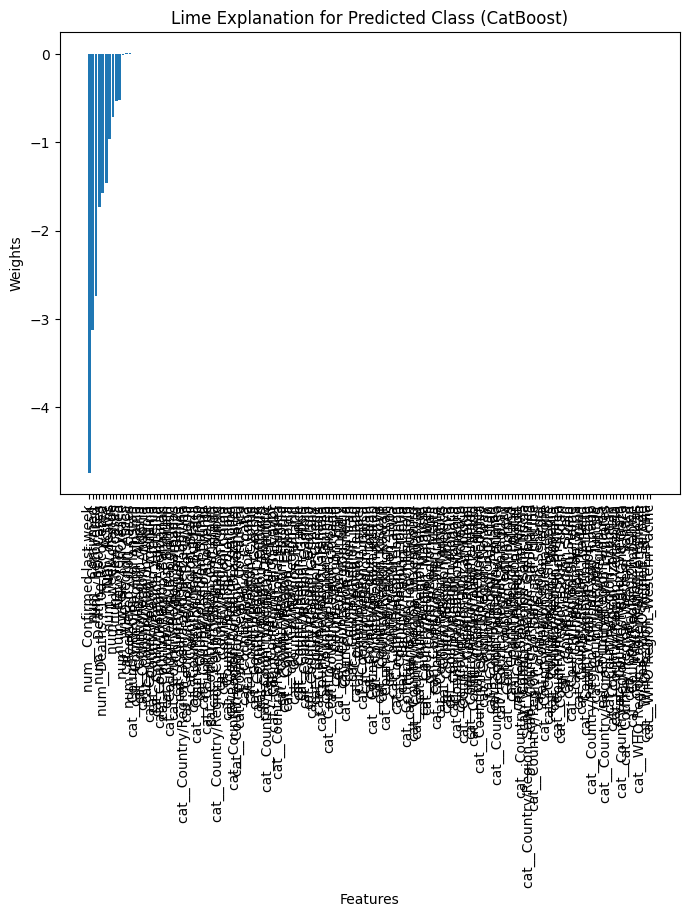

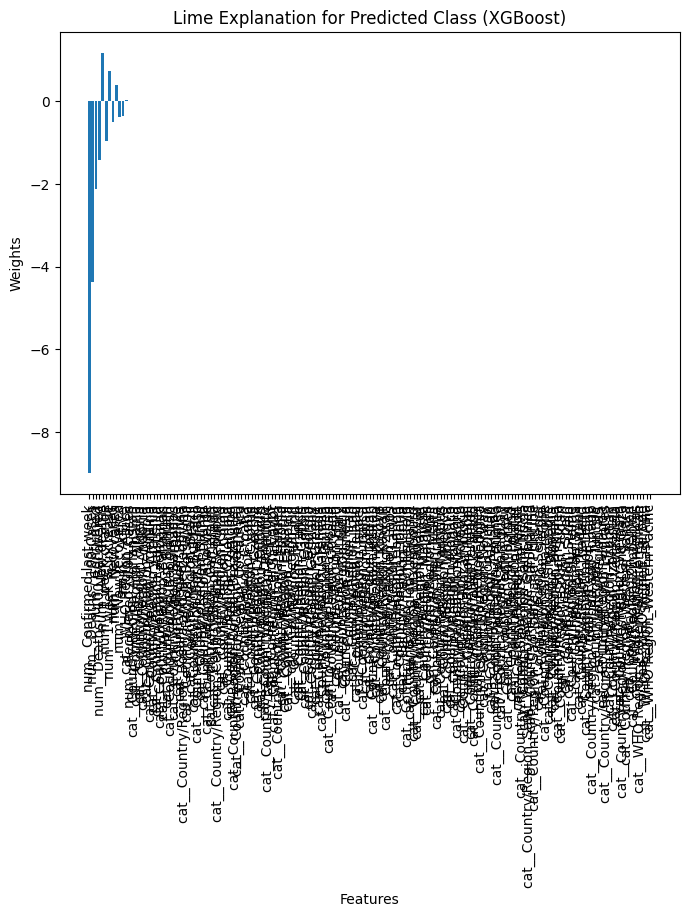

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lime import lime_tabular
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Define new threshold values for different risk levels
low_risk_threshold = 100
high_risk_threshold = 500

# Convert target variable into classes based on new thresholds
data['RiskLevel'] = np.where(data['Deaths'] <= low_risk_threshold, 'Low Risk',
                             np.where(data['Deaths'] <= high_risk_threshold, 'Medium Risk', 'High Risk'))

# Split the data into features (X) and target variable (y)
X = data.drop(['Deaths', 'RiskLevel'], axis=1)
y = data['RiskLevel']

# Encode the categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the preprocessing steps
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Replace infinity values with a large finite value
X_train.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data to float32
X_train_processed = X_train_processed.astype(np.float32)
X_test_processed = X_test_processed.astype(np.float32)

# Train CatBoost model
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_processed, y_train)

# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_processed, y_train)

# Initialize Lime explainer for CatBoost
catboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=preprocessor.get_feature_names_out(),
                                                            class_names=label_encoder.classes_)

# Select an instance for explanation for CatBoost
catboost_instance_index = 0
catboost_instance = X_test_processed[catboost_instance_index]

# Explain predictions using Lime for CatBoost
catboost_lime_explanation = catboost_lime_explainer.explain_instance(catboost_instance,
                                                                     catboost_model.predict_proba,
                                                                     num_features=len(preprocessor.get_feature_names_out()))

# Get Lime explanation for the predicted class for CatBoost
catboost_lime_explanation_predicted_class = catboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for CatBoost
print("Lime Explanation for Predicted Class (CatBoost):")
for feature_index, weight in catboost_lime_explanation_predicted_class:
    feature_name = preprocessor.get_feature_names_out()[feature_index]
    print(f"{feature_name}: {weight}")

# Initialize Lime explainer for XGBoost
xgboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=preprocessor.get_feature_names_out(),
                                                           class_names=label_encoder.classes_)

# Select an instance for explanation for XGBoost
xgboost_instance_index = 0
xgboost_instance = X_test_processed[xgboost_instance_index]

# Explain predictions using Lime for XGBoost
xgboost_lime_explanation = xgboost_lime_explainer.explain_instance(xgboost_instance,
                                                                   xgboost_model.predict_proba,
                                                                   num_features=len(preprocessor.get_feature_names_out()))

# Get Lime explanation for the predicted class for XGBoost
xgboost_lime_explanation_predicted_class = xgboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for XGBoost
print("Lime Explanation for Predicted Class (XGBoost):")
for feature_index, weight in xgboost_lime_explanation_predicted_class:
    feature_name = preprocessor.get_feature_names_out()[feature_index]
    print(f"{feature_name}: {weight}")

# Make predictions on the testing set using CatBoost
catboost_predictions = catboost_model.predict(X_test_processed)

# Make predictions on the testing set using XGBoost
xgboost_predictions = xgboost_model.predict(X_test_processed)

# Evaluate model performance for CatBoost
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print("CatBoost Accuracy:", catboost_accuracy)

# Evaluate model performance for XGBoost
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
print("XGBoost Accuracy:", xgboost_accuracy)

# Plot Lime explanation for CatBoost
plt.figure(figsize=(8, 6))
features, weights = zip(*catboost_lime_explanation_predicted_class)
feature_names = [preprocessor.get_feature_names_out()[feature_index] for feature_index, _ in catboost_lime_explanation_predicted_class]
plt.bar(feature_names, weights)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Lime Explanation for Predicted Class (CatBoost)')
plt.show()

# Plot Lime explanation for XGBoost
plt.figure(figsize=(8, 6))
features, weights = zip(*xgboost_lime_explanation_predicted_class)
feature_names = [preprocessor.get_feature_names_out()[feature_index] for feature_index, _ in xgboost_lime_explanation_predicted_class]
plt.bar(feature_names, weights)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Lime Explanation for Predicted Class (XGBoost)')
plt.show()


Learning rate set to 0.071805
0:	learn: 1.0467494	total: 11ms	remaining: 11s
1:	learn: 0.9898205	total: 22.3ms	remaining: 11.1s
2:	learn: 0.9342588	total: 33.9ms	remaining: 11.3s
3:	learn: 0.8940312	total: 45.7ms	remaining: 11.4s
4:	learn: 0.8526523	total: 57ms	remaining: 11.3s
5:	learn: 0.8147765	total: 68ms	remaining: 11.3s
6:	learn: 0.7836607	total: 80.6ms	remaining: 11.4s
7:	learn: 0.7615919	total: 90.4ms	remaining: 11.2s
8:	learn: 0.7281086	total: 101ms	remaining: 11.1s
9:	learn: 0.6968824	total: 113ms	remaining: 11.2s
10:	learn: 0.6746462	total: 124ms	remaining: 11.1s
11:	learn: 0.6503555	total: 134ms	remaining: 11.1s
12:	learn: 0.6271890	total: 145ms	remaining: 11s
13:	learn: 0.6105805	total: 162ms	remaining: 11.4s
14:	learn: 0.5879456	total: 171ms	remaining: 11.2s
15:	learn: 0.5705931	total: 181ms	remaining: 11.2s
16:	learn: 0.5541559	total: 200ms	remaining: 11.5s
17:	learn: 0.5395331	total: 210ms	remaining: 11.4s
18:	learn: 0.5230107	total: 221ms	remaining: 11.4s
19:	learn: 0.

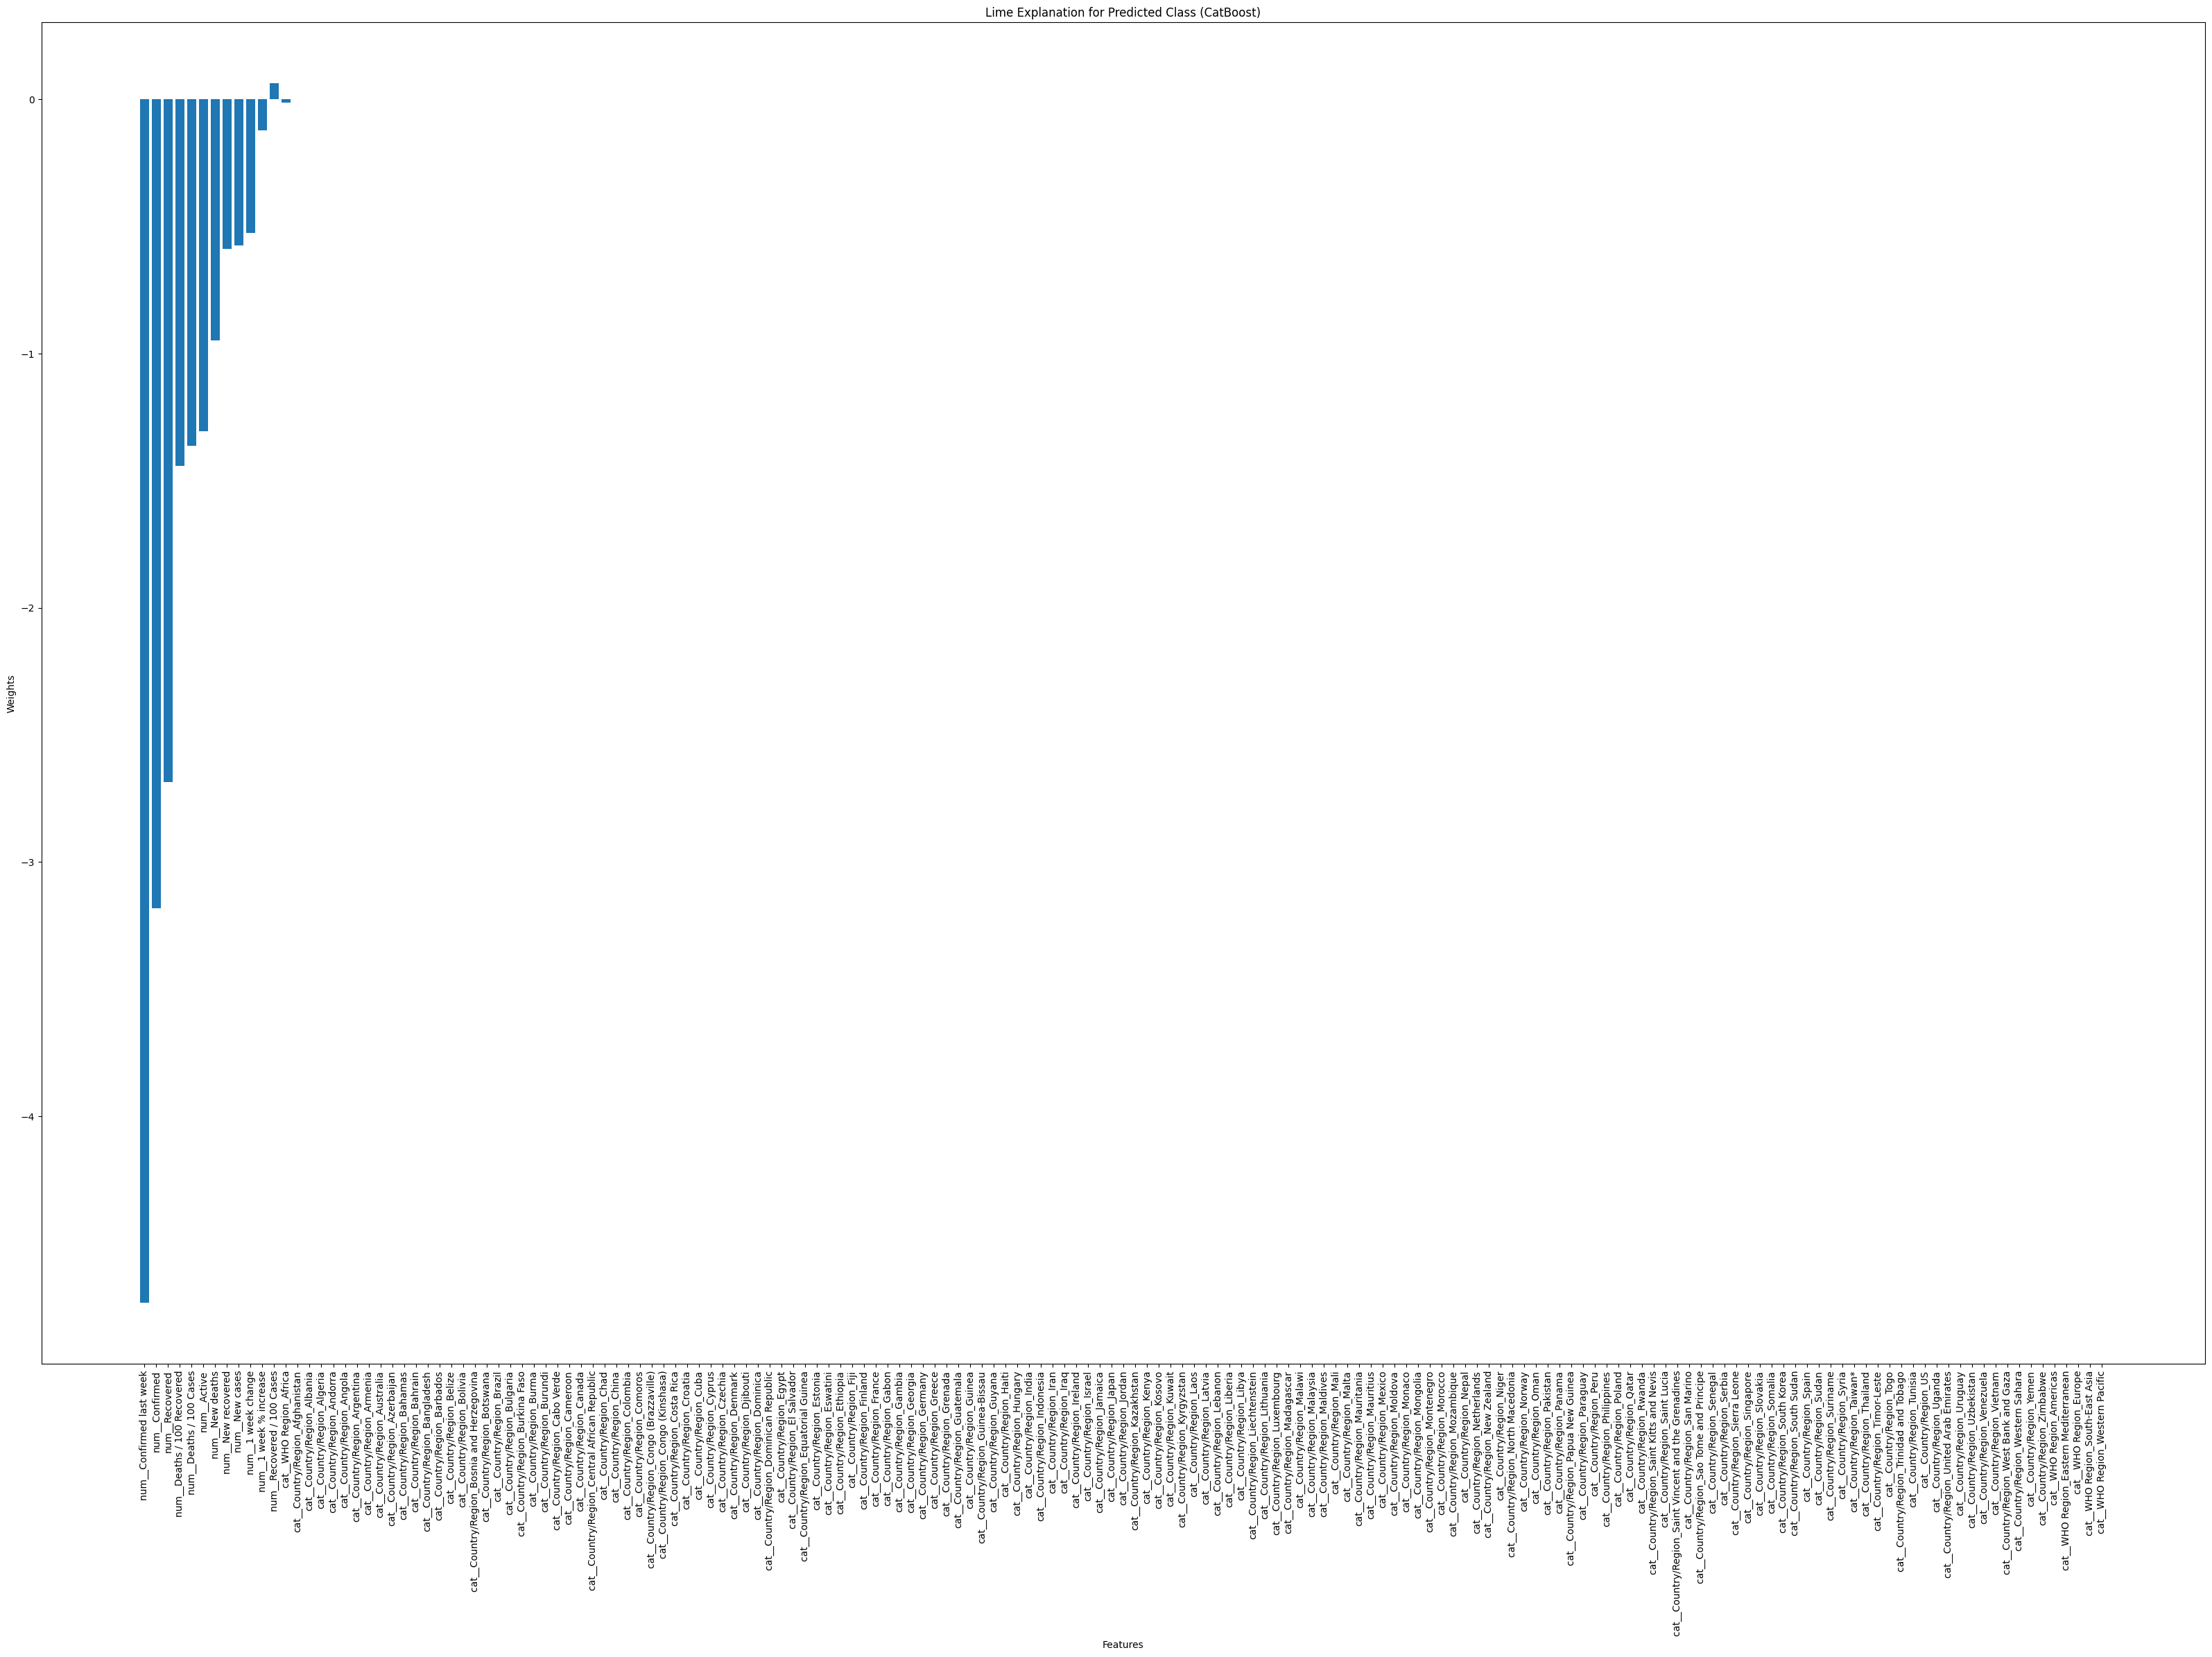

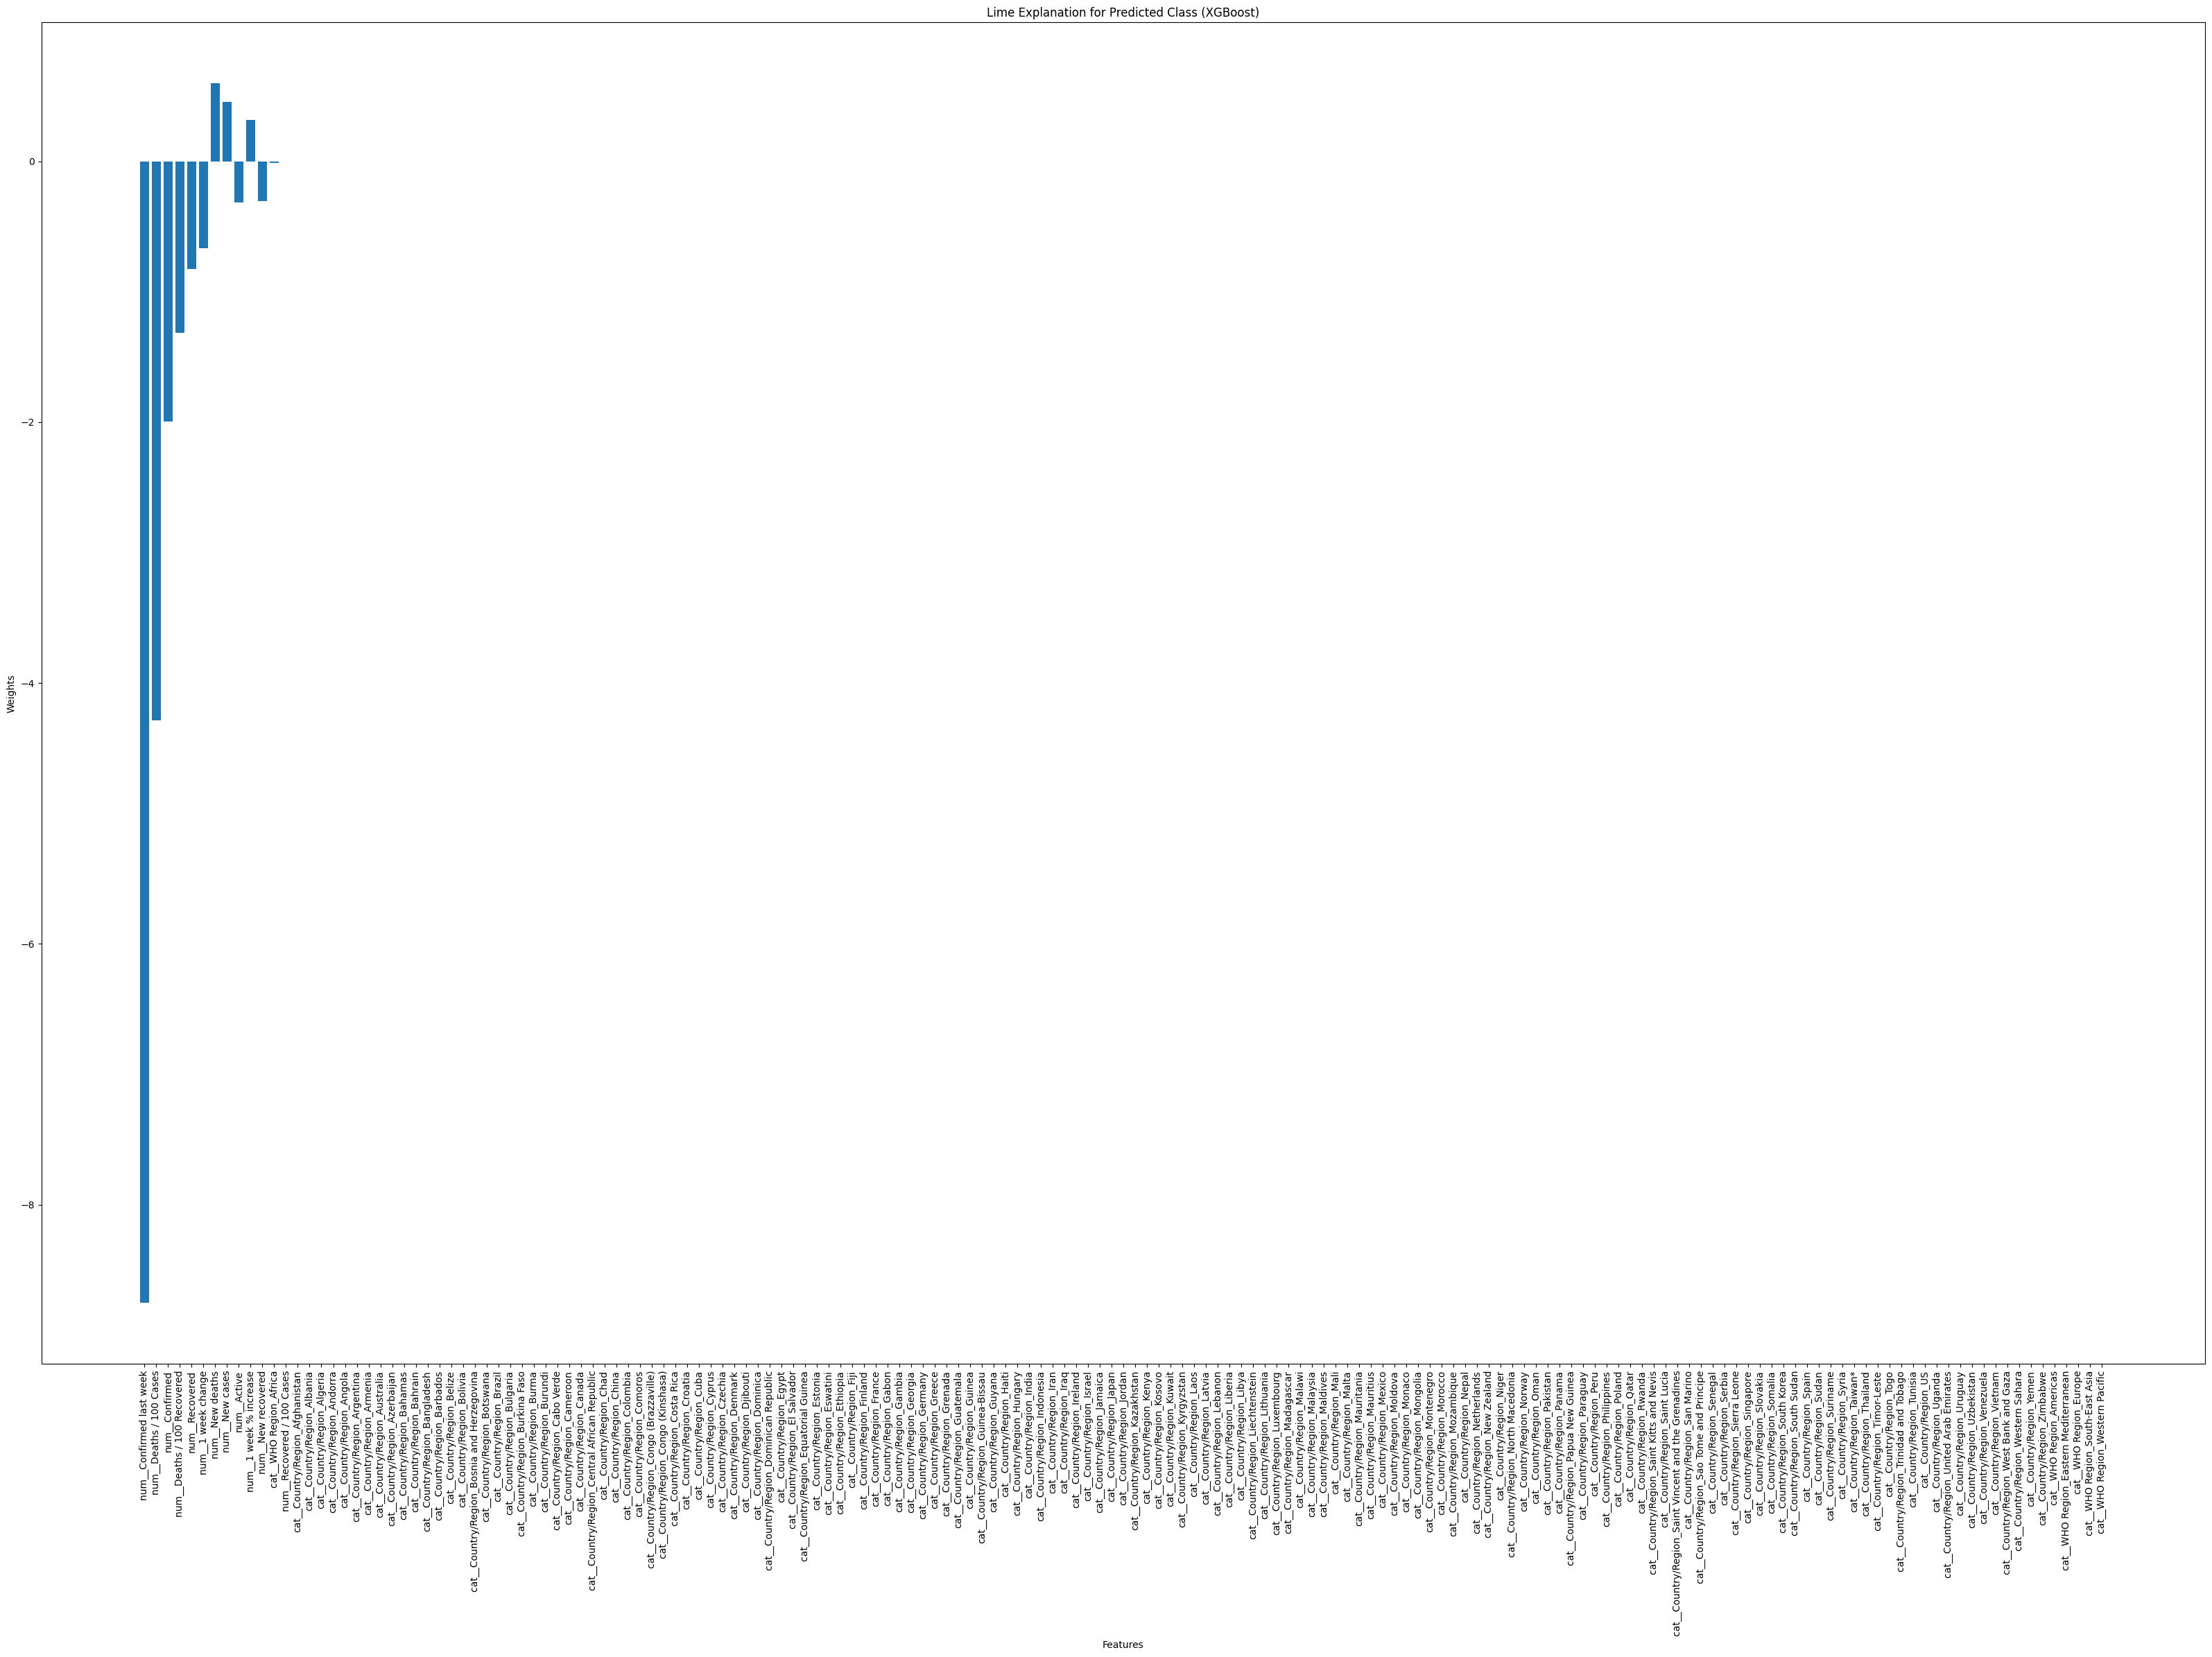

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lime import lime_tabular
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Define new threshold values for different risk levels
low_risk_threshold = 100
high_risk_threshold = 500

# Convert target variable into classes based on new thresholds
data['RiskLevel'] = np.where(data['Deaths'] <= low_risk_threshold, 'Low Risk',
                             np.where(data['Deaths'] <= high_risk_threshold, 'Medium Risk', 'High Risk'))

# Split the data into features (X) and target variable (y)
X = data.drop(['Deaths', 'RiskLevel'], axis=1)
y = data['RiskLevel']

# Encode the categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the preprocessing steps
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Replace infinity values with a large finite value
X_train.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data to float32
X_train_processed = X_train_processed.astype(np.float32)
X_test_processed = X_test_processed.astype(np.float32)

# Train CatBoost model
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_processed, y_train)

# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_processed, y_train)

# Initialize Lime explainer for CatBoost
catboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=preprocessor.get_feature_names_out(),
                                                            class_names=label_encoder.classes_)

# Select an instance for explanation for CatBoost
catboost_instance_index = 0
catboost_instance = X_test_processed[catboost_instance_index]

# Explain predictions using Lime for CatBoost
catboost_lime_explanation = catboost_lime_explainer.explain_instance(catboost_instance,
                                                                     catboost_model.predict_proba,
                                                                     num_features=len(preprocessor.get_feature_names_out()))

# Get Lime explanation for the predicted class for CatBoost
catboost_lime_explanation_predicted_class = catboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for CatBoost
print("Lime Explanation for Predicted Class (CatBoost):")
for feature_index, weight in catboost_lime_explanation_predicted_class:
    feature_name = preprocessor.get_feature_names_out()[feature_index]
    print(f"{feature_name}: {weight}")

# Initialize Lime explainer for XGBoost
xgboost_lime_explainer = lime_tabular.LimeTabularExplainer(X_train_processed, feature_names=preprocessor.get_feature_names_out(),
                                                           class_names=label_encoder.classes_)

# Select an instance for explanation for XGBoost
xgboost_instance_index = 0
xgboost_instance = X_test_processed[xgboost_instance_index]

# Explain predictions using Lime for XGBoost
xgboost_lime_explanation = xgboost_lime_explainer.explain_instance(xgboost_instance,
                                                                   xgboost_model.predict_proba,
                                                                   num_features=len(preprocessor.get_feature_names_out()))

# Get Lime explanation for the predicted class for XGBoost
xgboost_lime_explanation_predicted_class = xgboost_lime_explanation.local_exp[1]  # Assuming index 1 is the predicted label

# Print Lime explanation for XGBoost
print("Lime Explanation for Predicted Class (XGBoost):")
for feature_index, weight in xgboost_lime_explanation_predicted_class:
    feature_name = preprocessor.get_feature_names_out()[feature_index]
    print(f"{feature_name}: {weight}")

# Make predictions on the testing set using CatBoost
catboost_predictions = catboost_model.predict(X_test_processed)

# Make predictions on the testing set using XGBoost
xgboost_predictions = xgboost_model.predict(X_test_processed)

# Evaluate model performance for CatBoost
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print("CatBoost Accuracy:", catboost_accuracy)

# Evaluate model performance for XGBoost
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
print("XGBoost Accuracy:", xgboost_accuracy)

# Plot Lime explanation for CatBoost
plt.figure(figsize=(32,24))  # Increase figure size
features, weights = zip(*catboost_lime_explanation_predicted_class)
feature_names = [preprocessor.get_feature_names_out()[feature_index] for feature_index, _ in catboost_lime_explanation_predicted_class]
plt.bar(feature_names, weights)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Lime Explanation for Predicted Class (CatBoost)')
plt.tight_layout()  # Adjust spacing
plt.show()

# Plot Lime explanation for XGBoost
plt.figure(figsize=(32,24))  # Increase figure size
features, weights = zip(*xgboost_lime_explanation_predicted_class)
feature_names = [preprocessor.get_feature_names_out()[feature_index] for feature_index, _ in xgboost_lime_explanation_predicted_class]
plt.bar(feature_names, weights)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Lime Explanation for Predicted Class (XGBoost)')
plt.tight_layout()  # Adjust spacing
plt.show()


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**SHAP PLOTTING**

Learning rate set to 0.071805
0:	learn: 1.0467494	total: 4.75ms	remaining: 4.75s
1:	learn: 0.9898205	total: 9.82ms	remaining: 4.9s
2:	learn: 0.9342588	total: 16.3ms	remaining: 5.41s
3:	learn: 0.8940312	total: 20.8ms	remaining: 5.17s
4:	learn: 0.8526523	total: 27.6ms	remaining: 5.5s
5:	learn: 0.8147765	total: 32ms	remaining: 5.3s
6:	learn: 0.7836607	total: 38.5ms	remaining: 5.46s
7:	learn: 0.7615919	total: 46.9ms	remaining: 5.81s
8:	learn: 0.7281086	total: 56.4ms	remaining: 6.2s
9:	learn: 0.6968824	total: 66.8ms	remaining: 6.61s
10:	learn: 0.6746462	total: 81.1ms	remaining: 7.29s
11:	learn: 0.6503555	total: 91ms	remaining: 7.49s
12:	learn: 0.6271890	total: 102ms	remaining: 7.73s
13:	learn: 0.6105805	total: 111ms	remaining: 7.84s
14:	learn: 0.5879456	total: 121ms	remaining: 7.96s
15:	learn: 0.5705931	total: 143ms	remaining: 8.79s
16:	learn: 0.5541559	total: 155ms	remaining: 8.97s
17:	learn: 0.5395331	total: 176ms	remaining: 9.61s
18:	learn: 0.5230107	total: 192ms	remaining: 9.91s
19:	lea

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


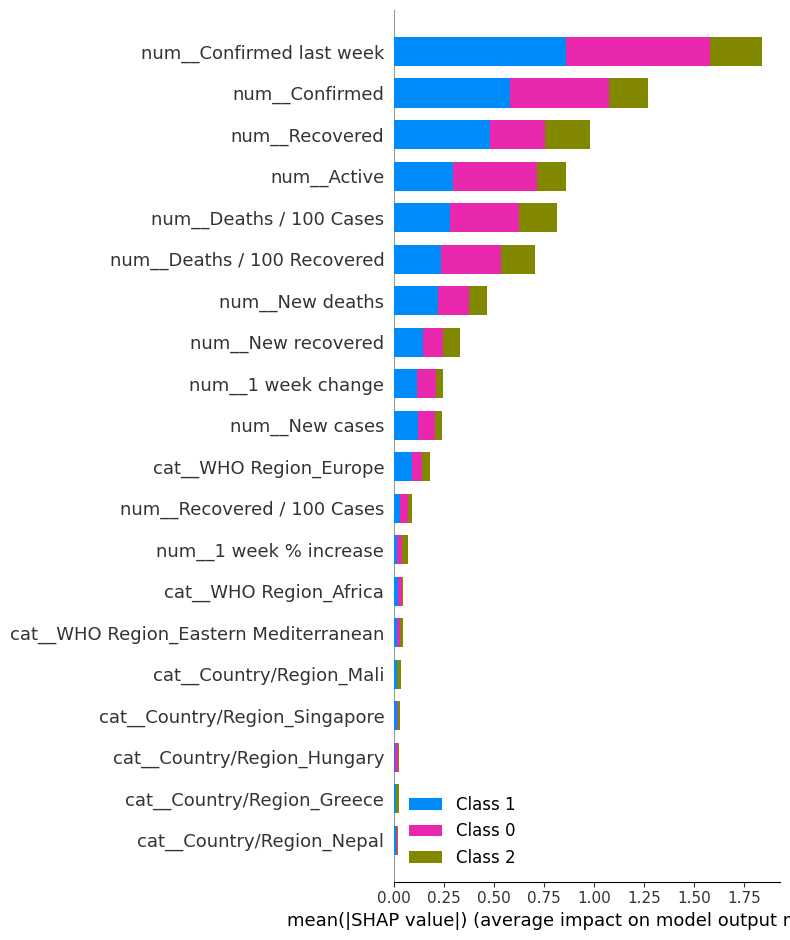

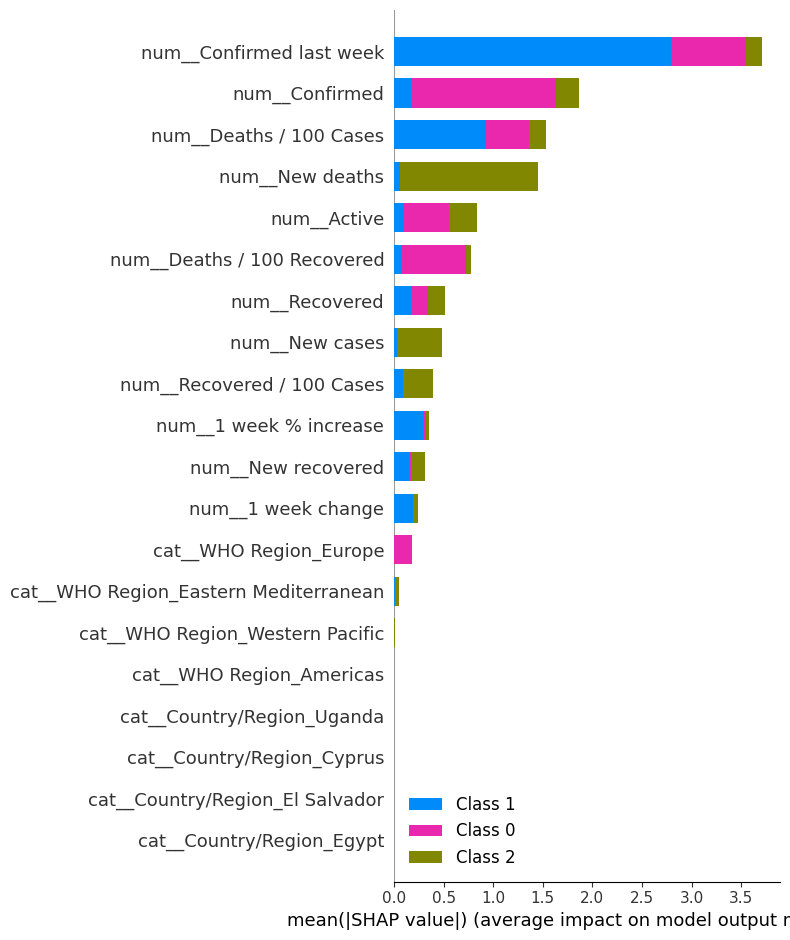

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import shap

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Define new threshold values for different risk levels
low_risk_threshold = 100
high_risk_threshold = 500

# Convert target variable into classes based on new thresholds
data['RiskLevel'] = np.where(data['Deaths'] <= low_risk_threshold, 'Low Risk',
                             np.where(data['Deaths'] <= high_risk_threshold, 'Medium Risk', 'High Risk'))

# Split the data into features (X) and target variable (y)
X = data.drop(['Deaths', 'RiskLevel'], axis=1)
y = data['RiskLevel']

# Encode the categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the preprocessing steps
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Replace infinity values with a large finite value
X_train.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data to float32
X_train_processed = X_train_processed.astype(np.float32)
X_test_processed = X_test_processed.astype(np.float32)

# Train CatBoost model
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_processed, y_train)

# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_processed, y_train)

# Explain predictions using SHAP for CatBoost
catboost_explainer = shap.Explainer(catboost_model)
catboost_shap_values = catboost_explainer.shap_values(X_test_processed)

# Explain predictions using SHAP for XGBoost
xgboost_explainer = shap.Explainer(xgboost_model)
xgboost_shap_values = xgboost_explainer.shap_values(X_test_processed)

# Plot SHAP summary plot for CatBoost
shap.summary_plot(catboost_shap_values, X_test_processed, feature_names=preprocessor.get_feature_names_out())

# Plot SHAP summary plot for XGBoost
shap.summary_plot(xgboost_shap_values, X_test_processed, feature_names=preprocessor.get_feature_names_out())


Feature importance 10 feature


Learning rate set to 0.071805
0:	learn: 1.0467494	total: 53.1ms	remaining: 53.1s
1:	learn: 0.9898205	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9342588	total: 62.6ms	remaining: 20.8s
3:	learn: 0.8940312	total: 67.3ms	remaining: 16.8s
4:	learn: 0.8526523	total: 72ms	remaining: 14.3s
5:	learn: 0.8147765	total: 76.8ms	remaining: 12.7s
6:	learn: 0.7836607	total: 81.7ms	remaining: 11.6s
7:	learn: 0.7615919	total: 86.5ms	remaining: 10.7s
8:	learn: 0.7281086	total: 91.2ms	remaining: 10s
9:	learn: 0.6968824	total: 96.2ms	remaining: 9.53s
10:	learn: 0.6746462	total: 101ms	remaining: 9.08s
11:	learn: 0.6503555	total: 106ms	remaining: 8.7s
12:	learn: 0.6271890	total: 111ms	remaining: 8.4s
13:	learn: 0.6105805	total: 115ms	remaining: 8.12s
14:	learn: 0.5879456	total: 120ms	remaining: 7.88s
15:	learn: 0.5705931	total: 125ms	remaining: 7.66s
16:	learn: 0.5541559	total: 129ms	remaining: 7.47s
17:	learn: 0.5395331	total: 134ms	remaining: 7.31s
18:	learn: 0.5230107	total: 139ms	remaining: 7.17s
19:	lea

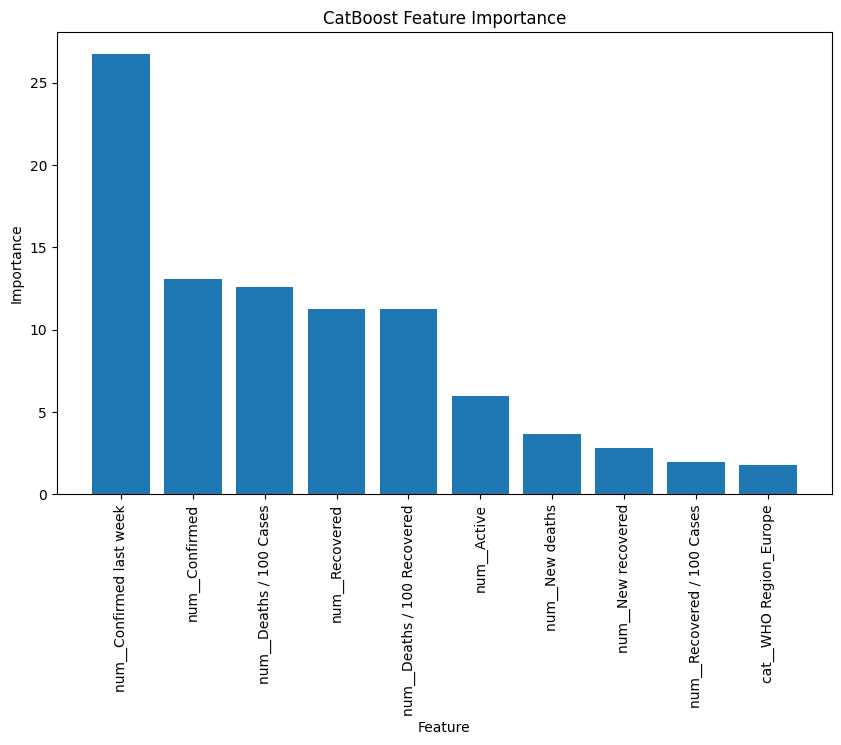

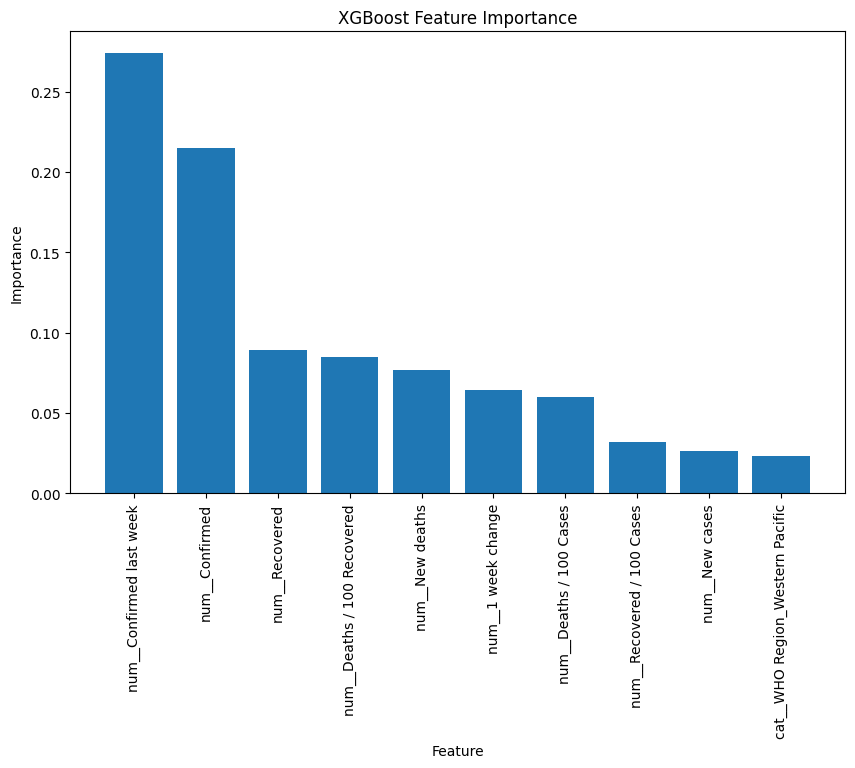

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Define new threshold values for different risk levels
low_risk_threshold = 100
high_risk_threshold = 500

# Convert target variable into classes based on new thresholds
data['RiskLevel'] = np.where(data['Deaths'] <= low_risk_threshold, 'Low Risk',
                             np.where(data['Deaths'] <= high_risk_threshold, 'Medium Risk', 'High Risk'))

# Split the data into features (X) and target variable (y)
X = data.drop(['Deaths', 'RiskLevel'], axis=1)
y = data['RiskLevel']

# Encode the categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the preprocessing steps
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Replace infinity values with a large finite value
X_train.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data to float32
X_train_processed = X_train_processed.astype(np.float32)
X_test_processed = X_test_processed.astype(np.float32)

# Train CatBoost model
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_processed, y_train)

# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_processed, y_train)

# Get feature importance for CatBoost
catboost_feature_importance = catboost_model.feature_importances_

# Get feature importance for XGBoost
xgboost_feature_importance = xgboost_model.feature_importances_

# Plot feature importance for CatBoost
plt.figure(figsize=(10, 6))
catboost_indices = np.argsort(catboost_feature_importance)[::-1][:10]  # Select top 10 features
plt.bar(range(len(catboost_indices)), catboost_feature_importance[catboost_indices],
        tick_label=np.array(preprocessor.get_feature_names_out())[catboost_indices])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('CatBoost Feature Importance')

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 6))
xgboost_indices = np.argsort(xgboost_feature_importance)[::-1][:10]  # Select top 10 features
plt.bar(range(len(xgboost_indices)), xgboost_feature_importance[xgboost_indices],
        tick_label=np.array(preprocessor.get_feature_names_out())[xgboost_indices])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importance')

plt.show()
